In [106]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df1=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
df=pd.concat([df,df1])
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         900 non-null    int64  
 1   GRE Score          900 non-null    int64  
 2   TOEFL Score        900 non-null    int64  
 3   University Rating  900 non-null    int64  
 4   SOP                900 non-null    float64
 5   LOR                900 non-null    float64
 6   CGPA               900 non-null    float64
 7   Research           900 non-null    int64  
 8   Chance of Admit    900 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 63.4 KB


In [107]:
df=df.drop(['Serial No.'],axis=1)
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [108]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


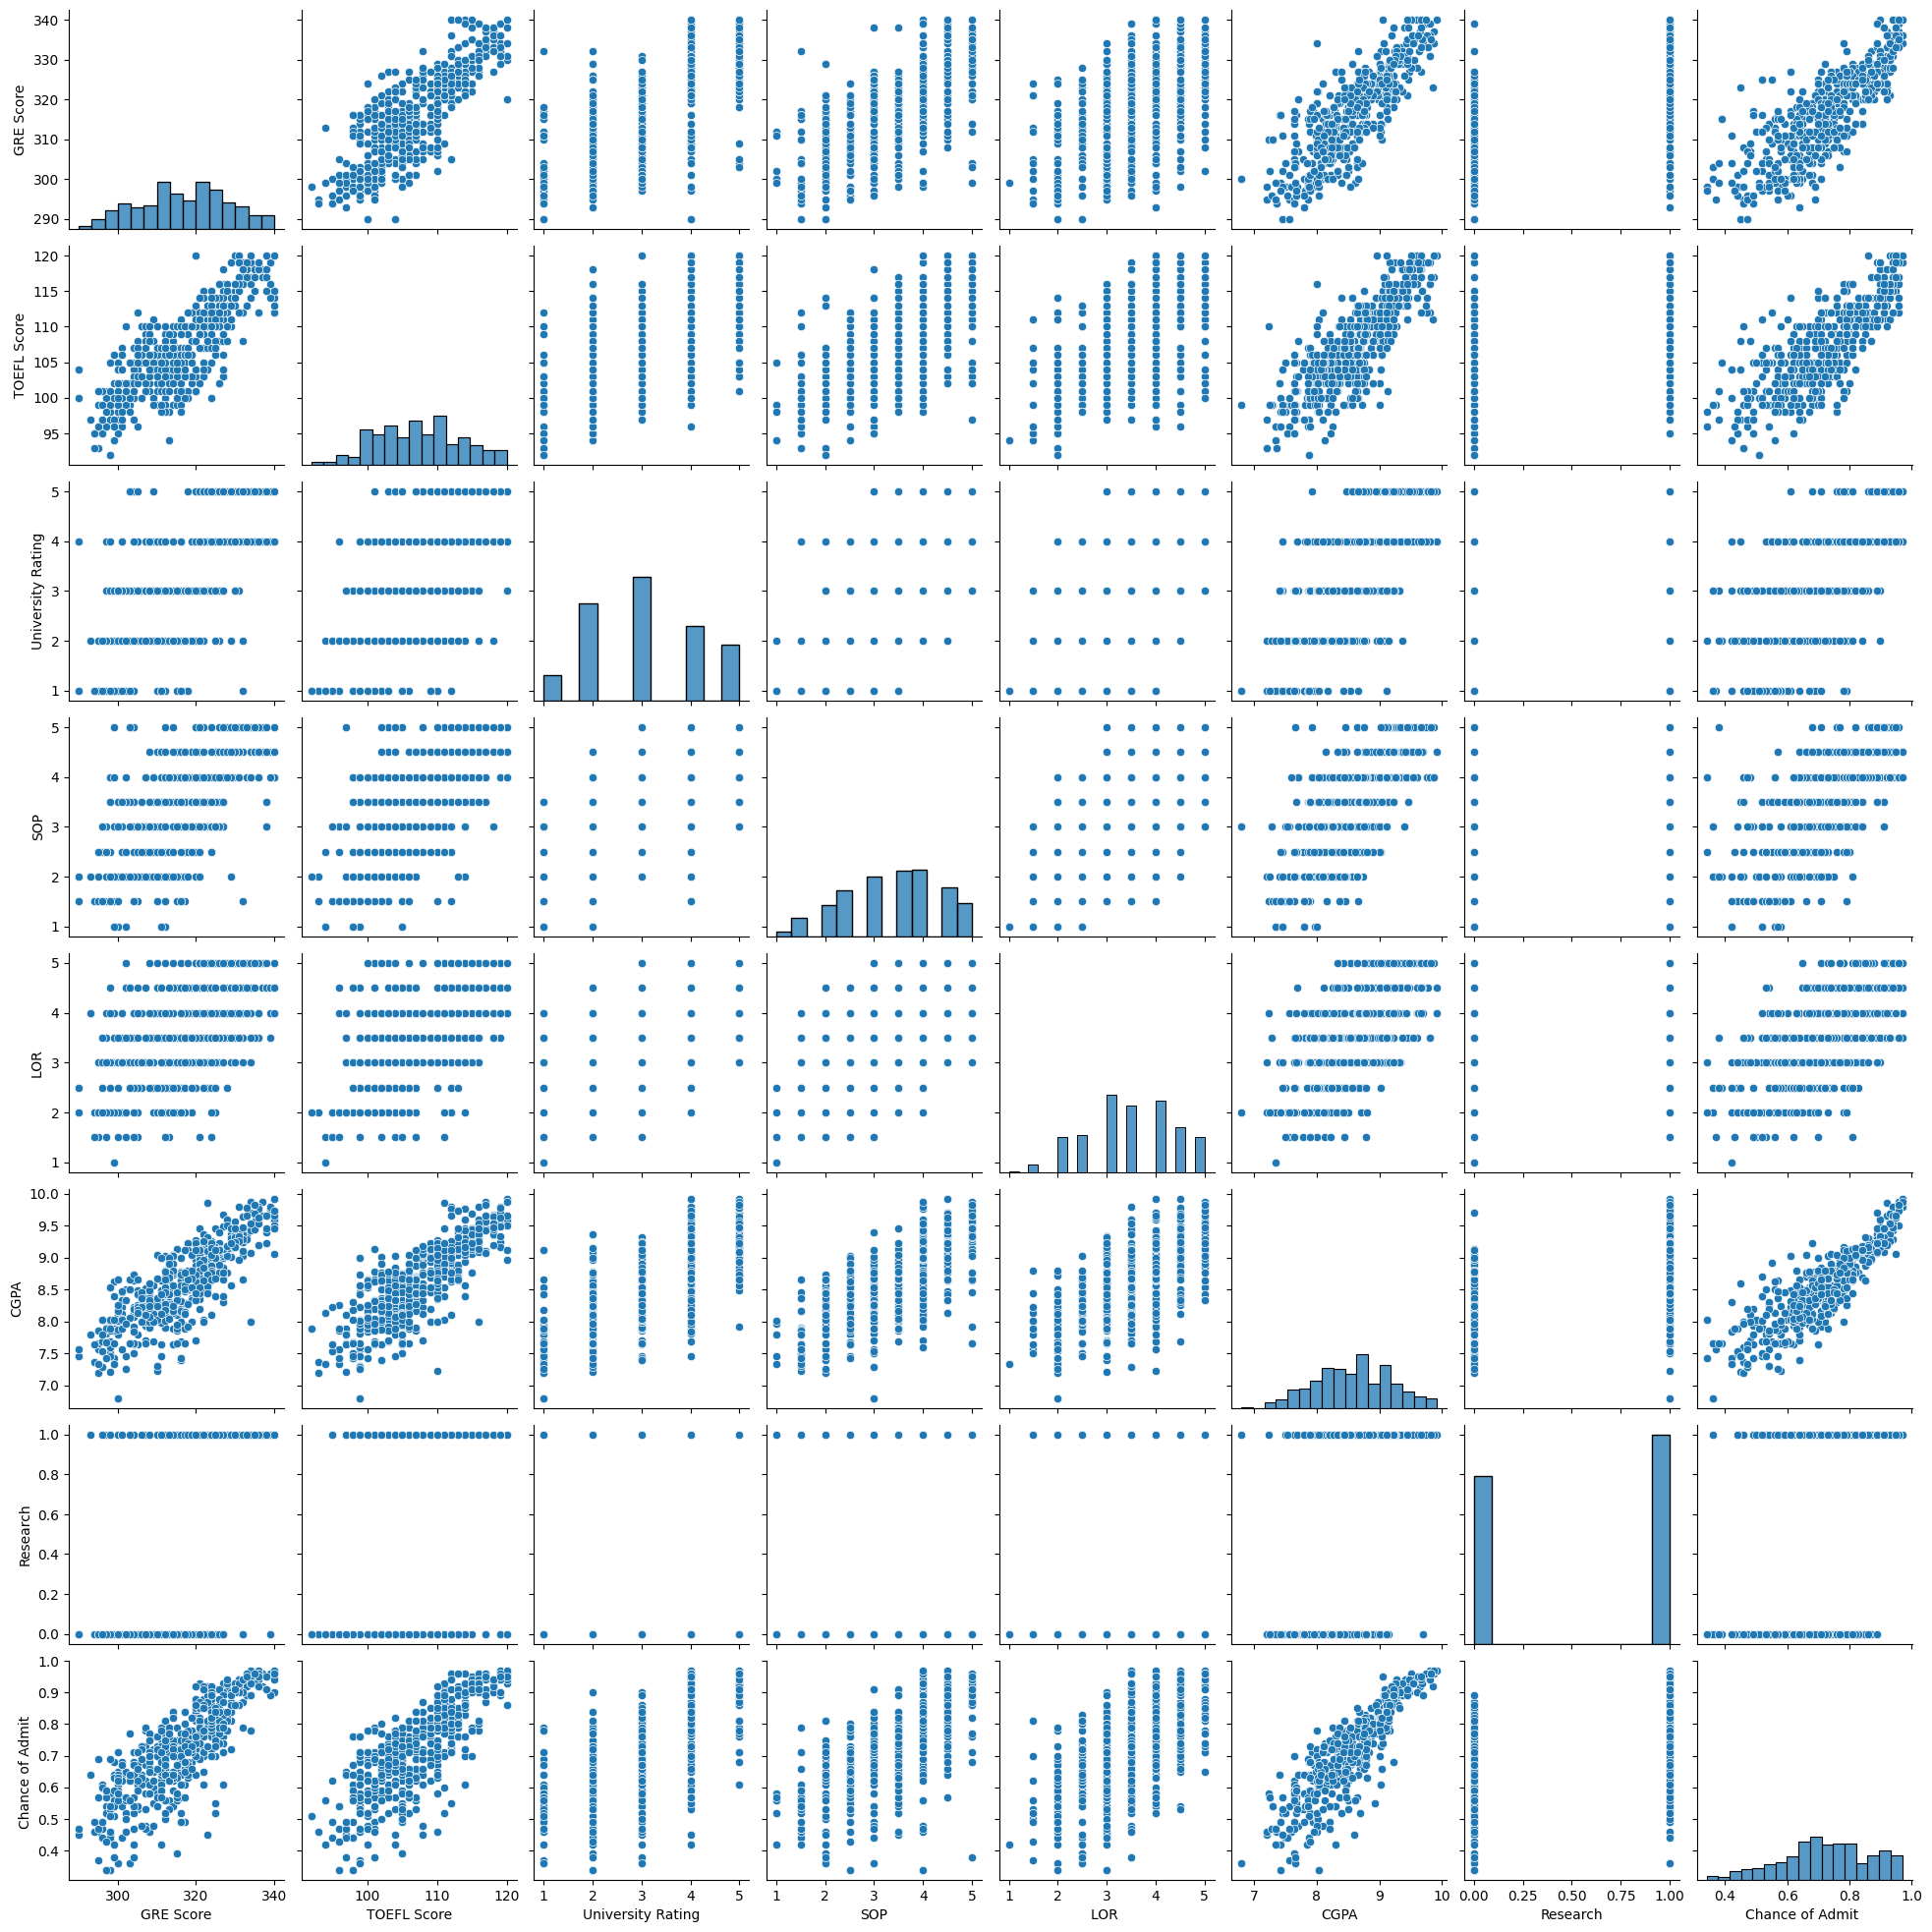

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

<Axes: >

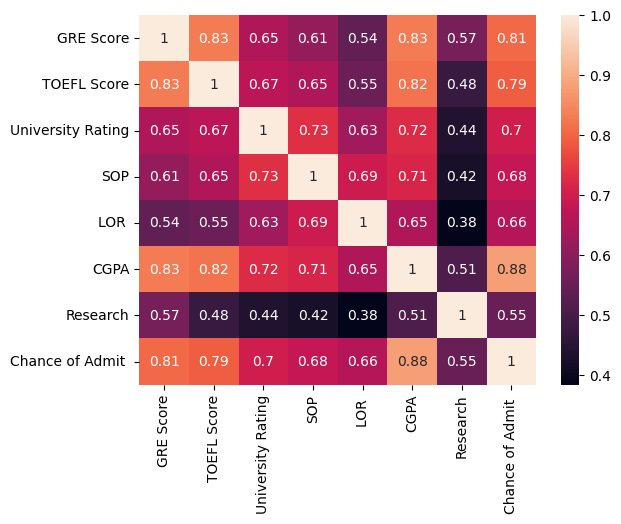

In [110]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [111]:
feature=dict(corr['Chance of Admit '])
sort_ord=sorted(feature.items(),key= lambda x:x[1])
sort_ord.pop()
print("Least Imp:",sort_ord[0][0])
print("Most Imp:",sort_ord[-1][0])

Least Imp: Research
Most Imp: CGPA


In [112]:
print("Order of importance DESC:")
i=len(sort_ord)-1
while i>=0:
    print(sort_ord[i][0])
    i-=1

Order of importance DESC:
CGPA
GRE Score
TOEFL Score
University Rating
SOP
LOR 
Research


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
trainx,valx,trainy,valy=train_test_split(df.drop('Chance of Admit ',axis=1).values,df['Chance of Admit '].values,test_size=0.1,random_state=1)
trainy=trainy.reshape(-1,1)
valy=valy.reshape(-1,1)
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression()

In [114]:
from sklearn.metrics import mean_squared_error
pred=lr.predict(valx)
print('MSE Loss:',mean_squared_error(valy,pred))

MSE Loss: 0.0034166975694063517


In [115]:
print("accuracy:",lr.score(valx,valy))

accuracy: 0.8571662646428856


In [116]:
#https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out




In [117]:
inputDim = 7        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.001 
epochs = 10000


In [118]:
model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()


In [119]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


In [120]:
verbose=True
lo=[]
for epoch in range(epochs+1):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(trainx)).float()
    labels = Variable(torch.from_numpy(trainy)).float()

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = torch.sqrt(criterion(outputs, labels))
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    lo.append(loss)

    if verbose and epoch % 1000 == 0:
        print(f"Epoch: {epoch}  |  Loss: {loss}")


Epoch: 0  |  Loss: 71.49576568603516
Epoch: 1000  |  Loss: 1.2527023553848267
Epoch: 2000  |  Loss: 0.7498189210891724
Epoch: 3000  |  Loss: 0.19979305565357208
Epoch: 4000  |  Loss: 0.06528577953577042
Epoch: 5000  |  Loss: 0.06463582813739777
Epoch: 6000  |  Loss: 0.0643296018242836
Epoch: 7000  |  Loss: 0.06412423402070999
Epoch: 8000  |  Loss: 0.06395792961120605
Epoch: 9000  |  Loss: 0.06381280720233917
Epoch: 10000  |  Loss: 0.06368402391672134


In [124]:
from sklearn.metrics import r2_score
predicted = model(Variable(torch.from_numpy(valx)).float()).data.numpy()
score = r2_score(valy, predicted)
print("The accuracy of our model is {}%".format(round(score, 2) *100))


The accuracy of our model is 84.0%


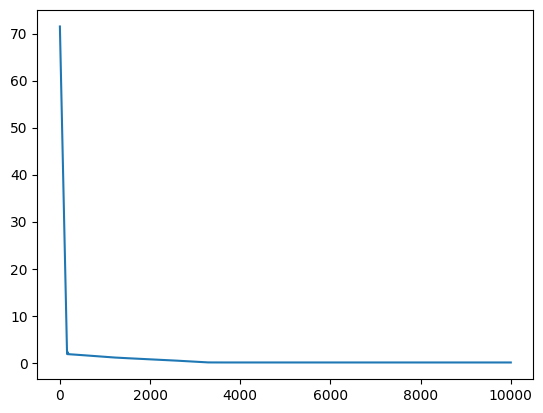

In [127]:
import matplotlib.pyplot as plt

# Assuming 'loss' is a list of tensors
loss_array = [l.detach().numpy() for l in lo]

plt.plot(loss_array)
plt.show()